In [93]:
def Line_mit_standardab(df,x,y,xLabel,yLabel,title): 
    fig = go.Figure(data=go.Scatter(
        x=x,
        y=y,
        error_y=dict(
            type='data',
            array=(df.max(axis=1)- df.mean(axis=1)),# iteration über rows (0 iteriert über columns)
            color='purple',
            visible=True),
        ))
    fig.update_layout(title=title)
    fig.update_xaxes(tickangle=45, title_text=xLabel)
    fig.update_yaxes(title_text=yLabel)
    fig.show()

def boxplot(df, variable, labels, show_y_label, width = None, medianprops=None):
    plt.boxplot(df[variable],labels=labels, widths=width, medianprops=medianprops)
    axes = plt.gca()
    #axes.set_ylim([-1,25])
    if (show_y_label):
            plt.ylabel(variable)

def barplot(df, xachse, yachse, color=None, text = None,labeldict=None):     
    fig = px.bar(df, x=xachse, y=yachse, color=color,text=text, height=700,labels=labeldict)
    fig.update_traces(marker_line_color='black')
    fig.update_xaxes(tickangle=45,tickfont=dict(color='black', size=13)) 
    fig.show()

def bar_mit_facet(df, xachse, yachse, reihe,color=None, text = None):
    fig = px.bar(df, x=xachse, y=yachse, color=color,text=text,height=700, 
             labels=dict(Preis = "Preis [€]",Anzahl_Tomaten='Anzahl'),facet_row=(reihe) )
    fig.update_xaxes(tickangle=45,tickfont=dict(color='black', size=13)) 
    fig.show()
    
def bar_mit_std(list_x_values, list_y_values, list_std,tick_label=None, y_label=None, x_label=None):
    errorbars=np.array([np.zeros(len(list_std)), list_std])
    plt.bar(x=list_x_values, height=list_y_values,width=0.3,color='lightgray',
             edgecolor='black',tick_label=tick_label,yerr=errorbars,capsize=4)
    plt.ylabel(y_label)
    plt.xlabel(x_label)
    #plt.ylim(-100,-130)

def showBox(frames,labels,ylabel,aAxis,aShowYLabel,x_label=None):
    aAxis.boxplot(frames,labels=labels)
    aAxis.set_ylim(-1,26)
    aAxis.set_xlabel(x_label)
    #print("mediane:",abw_häufig[aVariableName].median(),abw_selten[aVariableName].median());
    #aAxis.set_xlabel(aVariableName+" ["+aUnit+"]")
    if (aShowYLabel):
        aAxis.set_ylabel(ylabel)

def t_test(frame1,frame2):
    subset_c = frame1
    subset_t = frame2
    for testvar in daten.keys():
        if daten.dtypes[testvar]=="int64": #int64 == interval scaled variable
            tval,pval=ttest_ind(subset_c[testvar],subset_t[testvar])
            print("testvariable:",testvar,"tval=",'{:f}'.format(abs(tval)),"pval=",'{:f}'.format(pval))

def chisquare(frame,varnamey,varnamex):
    contingencyTable=pd.crosstab(frame[varnamey],frame[varnamex])
    chi2,pval,dof,expectedFreq=chi2_contingency(contingencyTable)
    print("\n\ntestvar:",varnamey,"chi2=",chi2,"pval=",'{:f}'.format(pval),"dof=",dof)#show pval in non-scienetific expression
    return contingencyTable

In [ ]:
x_values=['U','R']
listeY=[]
listeSTD=[]
for i in x_values:
    temp = daten[daten['address']==i]
    m = temp['G3'].mean()
    listeY.append(m)
    
for i in x_values:
    temp = daten[daten['address']==i]
    m = np.std(temp['G3'])
    listeSTD.append(m)
    
figure,axes=plt.subplots(figsize=(10,5))
bar_mit_std(x_values,listeY,listeSTD,y_label='Avg grade in G3',x_label='address',tick_label=['Urban','Rural'])

In [ ]:
figure,axes=plt.subplots(nrows=1,ncols=1,figsize=(12,4));
figure.subplots_adjust(wspace = 0.3)


showBox([],
        [],'Grades in G3',axes,True)

In [5]:
import pandas as pd
import numpy as np
import chart_studio.plotly as py
import cufflinks as cf
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats  import *
%matplotlib inline

# Make Plotly work in your Jupyter Notebook
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
# Use Plotly locally
cf.go_offline()

In [13]:
pd.set_option('display.max_columns', None)
daten = pd.read_csv('us_accidents_june20_samples100000.csv')

In [14]:
pd.set_option('expand_frame_repr', False)
daten

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,MapQuest,201,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,Right lane blocked due to accident on I-70 Eas...,NaN,I-70 E,R,Dayton,Montgomery,OH,45424,US,US/Eastern,KFFO,2016-02-08 05:58:00,36.9,NaN,91,29.68,10.0,Calm,NaN,0.02,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,MapQuest,201,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,Accident on Brice Rd at Tussing Rd. Expect del...,2584.0,Brice Rd,L,Reynoldsburg,Franklin,OH,43068-3402,US,US/Eastern,KCMH,2016-02-08 05:51:00,37.9,NaN,100,29.65,10.0,Calm,NaN,0.00,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,MapQuest,201,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,Accident on OH-32 State Route 32 Westbound at ...,NaN,State Route 32,R,Williamsburg,Clermont,OH,45176,US,US/Eastern,KI69,2016-02-08 06:56:00,36.0,33.3,100,29.67,10.0,SW,3.5,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,MapQuest,201,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,Accident on I-75 Southbound at Exits 52 52B US...,NaN,I-75 S,R,Dayton,Montgomery,OH,45417,US,US/Eastern,KDAY,2016-02-08 07:38:00,35.1,31.0,96,29.64,9.0,SW,4.6,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,MapQuest,201,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,Accident on McEwen Rd at OH-725 Miamisburg Cen...,NaN,Miamisburg Centerville Rd,R,Dayton,Montgomery,OH,45459,US,US/Eastern,KMGY,2016-02-08 07:53:00,36.0,33.3,89,29.65,6.0,SW,3.5,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,True,False,Day,Day,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,A-99997,MapQuest,201,2,2016-04-05 15:15:50,2016-04-05 16:15:50,33.232586,-117.145157,NaN,NaN,0.00,Accident on Champagne Blvd near Lawrence Welk Dr.,28657.0,Champagne Blvd,L,Escondido,San Diego,CA,92026,US,US/Pacific,KCRQ,2016-04-05 14:53:00,73.0,NaN,37,30.00,10.0,Variable,6.9,NaN,Clear,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
99996,A-99998,MapQuest,201,2,2016-04-05 15:28:56,2016-04-05 16:28:56,34.413689,-119.528625,NaN,NaN,0.00,Accident two trucks involved on CA-192 Foothil...,1707.0,Santa Monica Rd,L,Carpinteria,Santa Barbara,CA,93013-3068,US,US/Pacific,KSBA,2016-04-05 15:53:00,73.0,NaN,42,29.99,10.0,WSW,11.5,NaN,Clear,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
99997,A-99999,MapQuest,201,3,2016-04-05 15:45:49,2016-04-05 16:45:49,33.797134,-118.108017,NaN,NaN,0.00,Accident on I-405 Northbound before Palo Verde...,NaN,I-405 N,R,Long Beach,Los Angeles,CA,90815,US,US/Pacific,KLGB,2016-04-05 15:53:00,82.9,NaN,24,29.97,10.0,South,6.9,NaN,Clear,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
99998,A-100000,MapQuest,201,2,2016-04-05 15:47:30,2016-04-05 16:47:30,33.940449,-117.875900,NaN,NaN,0.00,Accident on CA-57 Southbound near Exit 11 Brea...,NaN,CA-57 S,R,Brea,Orange,CA,92821,US,US/Pacific,KFUL,2016-04-05 15:5

In [9]:
daten.columns

Index(['ID', 'Source', 'TMC', 'Severity', 'Start_Time', 'End_Time',
       'Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)',
       'Description', 'Number', 'Street', 'Side', 'City', 'County', 'State',
       'Zipcode', 'Country', 'Timezone', 'Airport_Code', 'Weather_Timestamp',
       'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)',
       'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)',
       'Precipitation(in)', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing',
       'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station',
       'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop',
       'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [11]:
daten.dtypes

ID                        object
Source                    object
TMC                        int64
Severity                   int64
Start_Time                object
End_Time                  object
Start_Lat                float64
Start_Lng                float64
End_Lat                  float64
End_Lng                  float64
Distance(mi)             float64
Description               object
Number                   float64
Street                    object
Side                      object
City                      object
County                    object
State                     object
Zipcode                   object
Country                   object
Timezone                  object
Airport_Code              object
Weather_Timestamp         object
Temperature(F)           float64
Wind_Chill(F)            float64
Humidity(%)                int64
Pressure(in)             float64
Visibility(mi)           float64
Wind_Direction            object
Wind_Speed(mph)          float64
Precipitat

In [20]:
daten['Temperature(F)'].max()

114.1

In [27]:
daten = daten[['ID', 'Source', 'Severity', 'Start_Time', 'End_Time',
       'Start_Lat', 'Start_Lng', 'Distance(mi)',
       'Description', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing',
       'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station',
       'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop',]]
daten

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,Distance(mi),Description,Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop
0,A-1,MapQuest,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,0.01,Right lane blocked due to accident on I-70 Eas...,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False
1,A-2,MapQuest,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,0.01,Accident on Brice Rd at Tussing Rd. Expect del...,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False
2,A-3,MapQuest,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,0.01,Accident on OH-32 State Route 32 Westbound at ...,Overcast,False,False,False,False,False,False,False,False,False,False,False,True,False
3,A-4,MapQuest,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,0.01,Accident on I-75 Southbound at Exits 52 52B US...,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False
4,A-5,MapQuest,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,0.01,Accident on McEwen Rd at OH-725 Miamisburg Cen...,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,A-99997,MapQuest,2,2016-04-05 15:15:50,2016-04-05 16:15:50,33.232586,-117.145157,0.00,Accident on Champagne Blvd near Lawrence Welk Dr.,Clear,False,False,False,False,False,False,False,False,False,False,False,False,False
99996,A-99998,MapQuest,2,2016-04-05 15:28:56,2016-04-05 16:28:56,34.413689,-119.528625,0.00,Accident two trucks involved on CA-192 Foothil...,Clear,False,False,False,False,False,False,False,False,False,False,False,False,False
99997,A-99999,MapQuest,3,2016-04-05 15:45:49,2016-04-05 16:45:49,33.797134,-118.108017,0.00,Accident on I-405 Northbound before Palo Verde...,Clear,False,False,False,False,False,False,False,False,False,False,False,False,False
99998,A-100000,MapQuest,2,2016-04-05 15:47:30,2016-04-05 16:47:30,33.940449,-117.875900,0.00,Accident on CA-57 Southbound near Exit 11 Brea...,Clear,False,False,False,False,False,False,False,False,False,False,False,False,False


In [36]:
daten.dtypes

ID                    object
Source                object
Severity               int64
Start_Time            object
End_Time              object
Start_Lat            float64
Start_Lng            float64
Distance(mi)         float64
Description           object
Weather_Condition     object
Amenity                 bool
Bump                    bool
Crossing                bool
Give_Way                bool
Junction                bool
No_Exit                 bool
Railway                 bool
Roundabout              bool
Station                 bool
Stop                    bool
Traffic_Calming         bool
Traffic_Signal          bool
Turning_Loop            bool
dtype: object

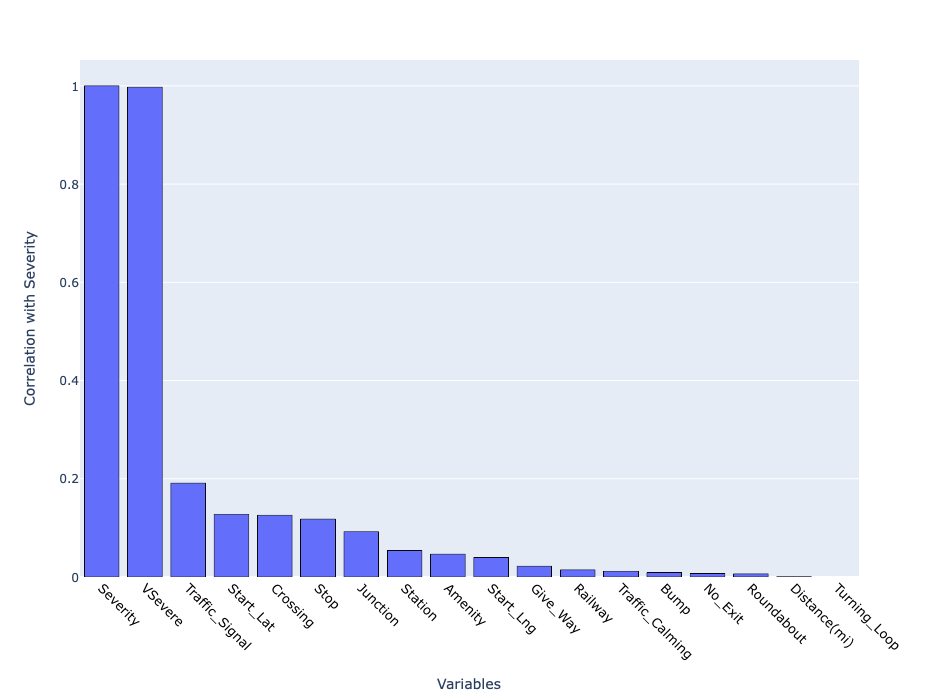

In [107]:
datencorr = daten.corr().reset_index()
datencorr['Severity'] = abs(datencorr.Severity)
datencorr = datencorr.sort_values('Severity',ascending=False)


barplot(datencorr,'index','Severity',labeldict=dict(Severity='Correlation with Severity',index = 'Variables'))

In [103]:
daten['VSevere'] = np.where(daten.Severity > 2,1,0)

[Text(0.5, 0, 'Severity'),
 Text(1.5, 0, 'Start_Lat'),
 Text(2.5, 0, 'Start_Lng'),
 Text(3.5, 0, 'Distance(mi)'),
 Text(4.5, 0, 'Amenity'),
 Text(5.5, 0, 'Bump'),
 Text(6.5, 0, 'Crossing'),
 Text(7.5, 0, 'Give_Way'),
 Text(8.5, 0, 'Junction'),
 Text(9.5, 0, 'No_Exit'),
 Text(10.5, 0, 'Railway'),
 Text(11.5, 0, 'Roundabout'),
 Text(12.5, 0, 'Station'),
 Text(13.5, 0, 'Stop'),
 Text(14.5, 0, 'Traffic_Calming'),
 Text(15.5, 0, 'Traffic_Signal'),
 Text(16.5, 0, 'Turning_Loop')]

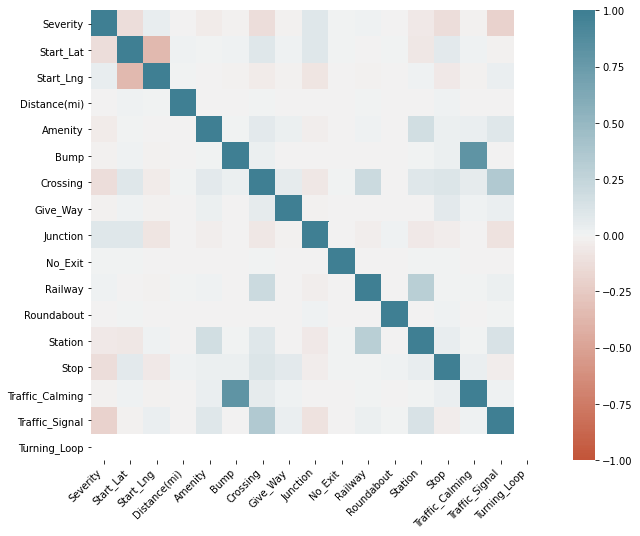

In [99]:
a4_dims = (11.7, 8.27)
#df = mylib.load_data()
fig, ax = plt.subplots(figsize=a4_dims)
corr = daten.corr()
ax = sns.heatmap(corr,ax=ax,  
                 vmin=-1, vmax=1, center=0,
                 cmap=sns.diverging_palette(20, 220, n=200),
                 square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)

In [104]:
daten.corr()

,Severity,Start_Lat,Start_Lng,Distance(mi),Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,VSevere
Severity,1.000000,-0.127791,0.039999,-0.000652,-0.046557,-0.008723,-0.125837,-0.022058,0.092127,0.007573,0.014522,-0.006338,-0.053591,-0.117959,-0.011738,-0.191156,NaN,0.997380
Start_Lat,-0.127791,1.000000,-0.366807,0.018194,0.002923,0.011030,0.101460,0.017452,0.096314,0.006720,-0.005205,0.006757,-0.063254,0.075839,0.012349,-0.009078,NaN,-0.128016
Start_Lng,0.039999,-0.366807,1.000000,0.000544,-0.003410,-0.008696,-0.045202,-0.016868,-0.084704,-0.007356,-0.008783,-0.003143,0.021597,-0.047000,-0.011078,0.034471,NaN,0.040059
Distance(mi),-0.000652,0.018194,0.000544,1.000000,-0.001412,-0.000548,0.000781,-0.000704,-0.004702,-0.000508,0.001368,-0.000306,-0.003039,0.009924,-0.000561,-0.007148,NaN,-0.000703
Amenity,-0.046557,0.002923,-0.003410,-0.001412,1.000000,0.005648,0.070532,0.026648,-0.030534,-0.001594,0.022797,-0.000651,0.173516,0.030105,0.032909,0.096755,NaN,-0.046256
Bump,-0.008723,0.011030,-0.008696,-0.000548,0.005648,1.000000,0.030298,-0.000462,-0.003218,-0.000268,-0.001718,-0.000110,0.005686,0.029263,0.816448,-0.000599,NaN,-0.008788
Crossing,-0.125837,0.101460,-0.045202,0.000781,0.070532,0.030298,1.000000,0.054748,-0.065655,0.002495,0.209192,-0.001421,0.096873,0.116831,0.053479,0.358804,NaN,-0.125291
Give_Way,-0.022058,0.017452,-0.016868,-0.000704,0.026648,-0.000462,0.054748,1.000000,-0.010248,-0.000517,-0.000249,-0.000211,-0.002699,0.077528,0.017111,0.033882,NaN,-0.021536
Junction,0.092127,0.096314,-0.084704,-0.004702,-0.030534,-0.003218,-0.065655,-0.010248,1.000000,-0.004068,-0.028869,0.020593,-0.048098,-0.037090,-0.004800,-0.093897,NaN,0.092087
No_Exit,0.007573,0.006720,-0.007356,-0.000508,-0.001594,-0.000268,0.002495,-0.000517,-0.004068,1.000000,-0.001921,-0.000122,0.004526,0.005522,-0.000329,-0.005601,NaN,0.007589


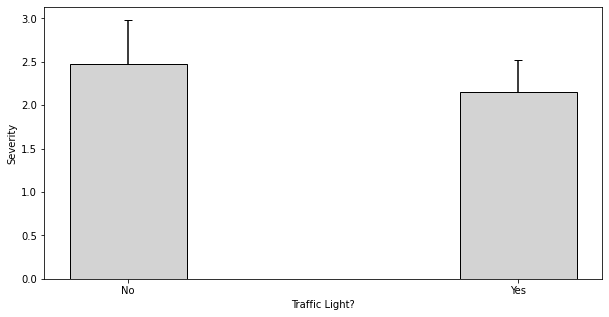

In [101]:
x_values=[False,True]
listeY=[]
listeSTD=[]
for i in x_values:
    temp = daten[daten['Traffic_Signal']==i]
    m = temp['Severity'].mean()
    listeY.append(m)
    
for i in x_values:
    temp = daten[daten['Traffic_Signal']==i]
    m = np.std(temp['Severity'])
    listeSTD.append(m)
    
figure,axes=plt.subplots(figsize=(10,5))
bar_mit_std(x_values,listeY,listeSTD,y_label='Severity',x_label='Traffic Light?',tick_label=['No','Yes'])

In [54]:
datenLAT = daten.sort_values('Start_Lat')

[36.127722999999996, 35.87263684646979, 35.33196117295513, 35.73804012121212]


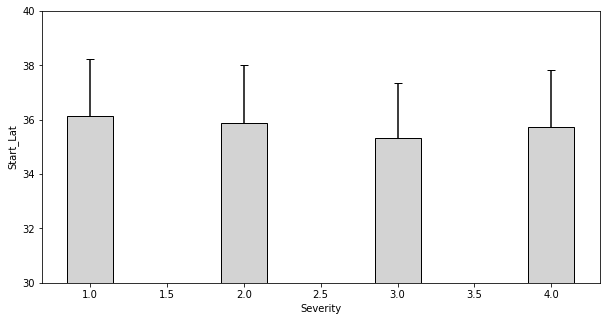

In [65]:
x_values=[1,2,3,4]
listeY=[]
listeSTD=[]
for i in x_values:
    temp = daten[daten['Severity']==i]
    m = temp['Start_Lat'].mean()
    listeY.append(m)
    
for i in x_values:
    temp = daten[daten['Severity']==i]
    m = np.std(temp['Start_Lat'])
    listeSTD.append(m)
    
figure,axes=plt.subplots(figsize=(10,5))
bar_mit_std(x_values,listeY,listeSTD,y_label='Start_Lat',x_label='Severity')
print(listeY)

[-119.37499480612243, -119.45533055712856, -119.16048207254035, -118.67248466666668]


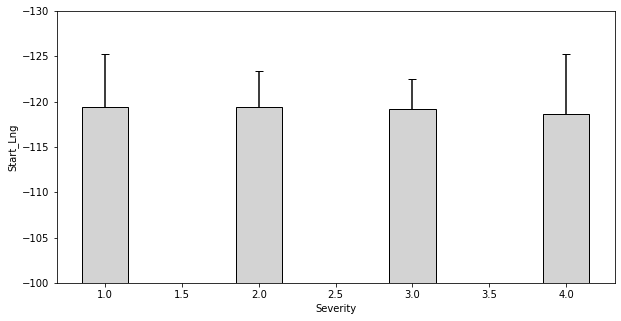

In [73]:
x_values=[1,2,3,4]
listeY=[]
listeSTD=[]
for i in x_values:
    temp = daten[daten['Severity']==i]
    m = temp['Start_Lng'].mean()
    listeY.append(m)
    
for i in x_values:
    temp = daten[daten['Severity']==i]
    m = -np.std(temp['Start_Lng'])
    listeSTD.append(m)
    
figure,axes=plt.subplots(figsize=(10,5))
bar_mit_std(x_values,listeY,listeSTD,y_label='Start_Lng',x_label='Severity')
print(listeY)

In [106]:
t_test(daten[daten.VSevere==1],daten[daten.VSevere==0])

testvariable: Severity tval= 4359.711095 pval= 0.000000
testvariable: Start_Lat tval= 40.817731 pval= 0.000000
testvariable: Start_Lng tval= 12.677786 pval= 0.000000
testvariable: Distance(mi) tval= 0.222178 pval= 0.824176
testvariable: VSevere tval= inf pval= 0.000000


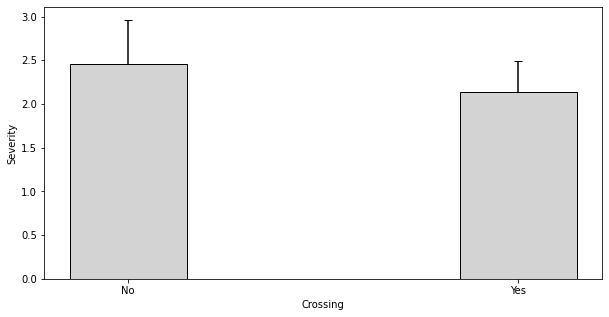

In [68]:
x_values=[False,True]
listeY=[]
listeSTD=[]
for i in x_values:
    temp = daten[daten['Crossing']==i]
    m = temp['Severity'].mean()
    listeY.append(m)
    
for i in x_values:
    temp = daten[daten['Crossing']==i]
    m = np.std(temp['Severity'])
    listeSTD.append(m)
    
figure,axes=plt.subplots(figsize=(10,5))
bar_mit_std(x_values,listeY,listeSTD,y_label='Severity',x_label='Crossing',tick_label=['No','Yes'])

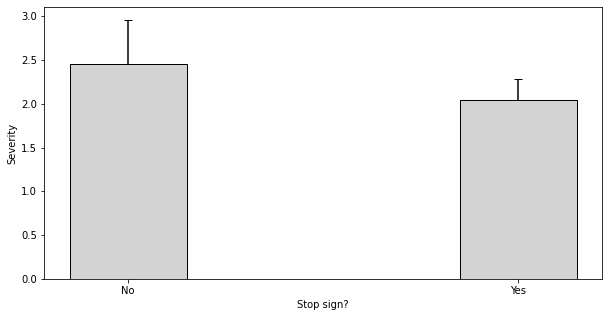

In [69]:
x_values=[False,True]
listeY=[]
listeSTD=[]
for i in x_values:
    temp = daten[daten['Stop']==i]
    m = temp['Severity'].mean()
    listeY.append(m)
    
for i in x_values:
    temp = daten[daten['Stop']==i]
    m = np.std(temp['Severity'])
    listeSTD.append(m)
    
figure,axes=plt.subplots(figsize=(10,5))
bar_mit_std(x_values,listeY,listeSTD,y_label='Severity',x_label='Stop sign?',tick_label=['No','Yes'])

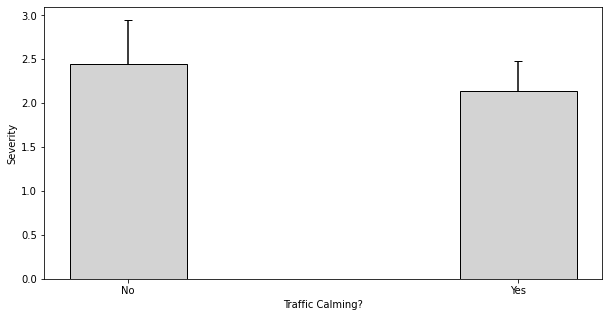

In [82]:
x_values=[False,True]
listeY=[]
listeSTD=[]
for i in x_values:
    temp = daten[daten['Traffic_Calming']==i]
    m = temp['Severity'].mean()
    listeY.append(m)
    
for i in x_values:
    temp = daten[daten['Traffic_Calming']==i]
    m = np.std(temp['Severity'])
    listeSTD.append(m)
    
figure,axes=plt.subplots(figsize=(10,5))
bar_mit_std(x_values,listeY,listeSTD,y_label='Severity',x_label='Traffic Calming?',tick_label=['No','Yes'])

In [51]:
chisquare(daten,'Severity','Traffic_Signal')



testvar: Severity chi2= 3676.6476013526544 pval= 0.000000 dof= 3


Traffic_Signal,False,True
Severity,,
1,84,14
2,47030,7995
3,43390,1454
4,31,2


In [52]:
chisquare(daten,'Severity','Give_Way')



testvar: Severity chi2= 54.803853192777254 pval= 0.000000 dof= 3


Give_Way,False,True
Severity,,
1,97,1
2,54945,80
3,44836,8
4,33,0


In [53]:
chisquare(daten,'Severity','Turning_Loop')



testvar: Severity chi2= 0.0 pval= 1.000000 dof= 0


Turning_Loop,False
Severity,
1,98
2,55025
3,44844
4,33


In [81]:
chisquare(daten,'Severity','Bump')



testvar: Severity chi2= 7.777764269885447 pval= 0.050835 dof= 3


Bump,False,True
Severity,,
1,98,0
2,55005,20
3,44840,4
4,33,0


In [83]:
chisquare(daten,'Severity','Crossing')



testvar: Severity chi2= 1592.5146284968632 pval= 0.000000 dof= 3


Crossing,False,True
Severity,,
1,83,15
2,51695,3330
3,44306,538
4,32,1


In [90]:
chisquare(daten,'Severity','Bump')



testvar: Severity chi2= 7.777764269885447 pval= 0.050835 dof= 3


Bump,False,True
Severity,,
1,98,0
2,55005,20
3,44840,4
4,33,0


In [ ]:
chi_test1 = pd.crosstab(daten['G3'], daten["freetime"]) 
stats.chi2_contingency(chi_test1)